In [1]:
pwd

'C:\\Users\\kevin'

In [2]:
import nltk
from nltk import FreqDist
nltk.download('stopwords') # run this one time

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_json('Automotive_5.json', lines=True)
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B00002243X,"[4, 4]",5,I needed a set of jumper cables for my new car and these had good reviews and were at a good price. They have been used a few times already and do what they are supposed to - no complaints there....,"08 17, 2011",A3F73SC1LY51OO,Alan Montgomery,Work Well - Should Have Bought Longer Ones,1313539200
1,B00002243X,"[1, 1]",4,"These long cables work fine for my truck, but the quality seems a little on the shabby side. For the money I was not expecting 200 dollar snap-on jumper cables but these seem more like what you wo...","09 4, 2011",A20S66SKYXULG2,alphonse,Okay long cables,1315094400
2,B00002243X,"[0, 0]",5,"Can't comment much on these since they have not yet been used (I will come back and update my review is I find any issues after first use) ... but they are built solid, nice tough big hard clamps ...","07 25, 2013",A2I8LFSN2IS5EO,Chris,Looks and feels heavy Duty,1374710400
3,B00002243X,"[19, 19]",5,"I absolutley love Amazon!!! For the price of a set of cheap Booster/Jumper Cables in a brick and morter store, you can buy extra long and heavy duty jumpers! First off, don't be the person that ...","12 21, 2010",A3GT2EWQSO45ZG,DeusEx,Excellent choice for Jumper Cables!!!,1292889600
4,B00002243X,"[0, 0]",5,"I purchased the 12' feet long cable set and they arrived in a retail cardboard box with handle, which could be used as a storage and carrying case for these cables, although I will not need to sto...","07 4, 2012",A3ESWJPAVRPWB4,E. Hernandez,"Excellent, High Quality Starter Cables",1341360000


In [5]:
# function to plot most frequent terms

def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

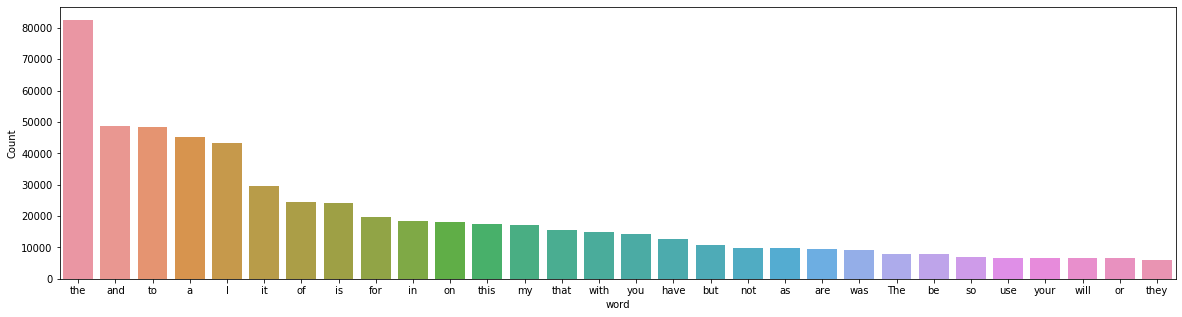

In [6]:
freq_words(df['reviewText'])

In [7]:
# remove unwanted characters, numbers and symbols
df['reviewText'] = df['reviewText'].str.replace("[^a-zA-Z#]", " ")

In [8]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [9]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['reviewText']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

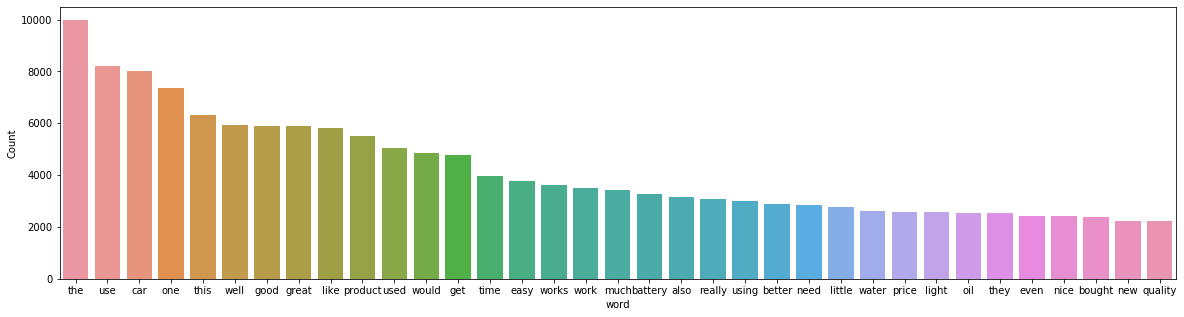

In [10]:
freq_words(reviews, 35)

In [11]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [12]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [13]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['these', 'long', 'cables', 'work', 'fine', 'truck', 'quality', 'seems', 'little', 'shabby', 'side', 'for', 'money', 'expecting', 'dollar', 'snap', 'jumper', 'cables', 'seem', 'like', 'would', 'see', 'chinese', 'knock', 'shop', 'like', 'harbor', 'freight', 'bucks']


In [14]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

['long', 'cable', 'fine', 'truck', 'quality', 'little', 'shabby', 'side', 'money', 'dollar', 'snap', 'jumper', 'cable', 'chinese', 'shop', 'harbor', 'freight', 'buck']


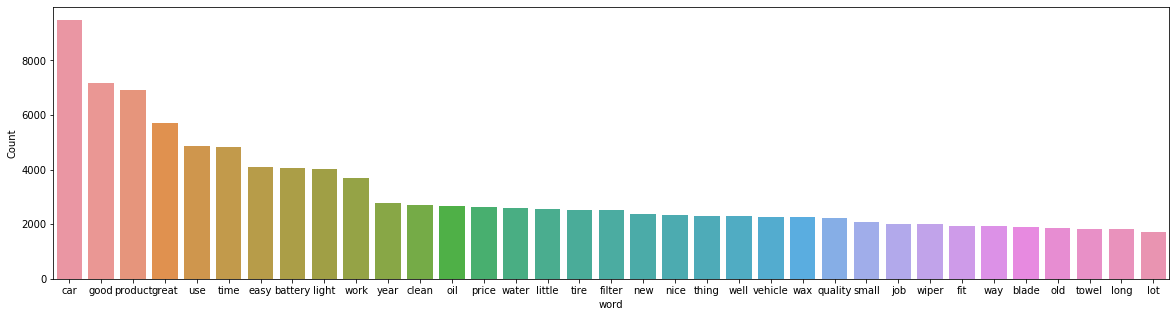

In [15]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

df['reviews'] = reviews_3

freq_words(df['reviews'], 35)

In [16]:
dictionary = corpora.Dictionary(reviews_2)

In [17]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

In [18]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)

In [19]:
lda_model.print_topics()

[(0,
  '0.035*"oil" + 0.026*"filter" + 0.017*"change" + 0.016*"car" + 0.016*"engine" + 0.015*"good" + 0.012*"inverter" + 0.012*"price" + 0.011*"product" + 0.011*"bosch"'),
 (1,
  '0.026*"wiper" + 0.026*"blade" + 0.019*"good" + 0.011*"plastic" + 0.011*"windshield" + 0.010*"quality" + 0.010*"work" + 0.009*"side" + 0.009*"fit" + 0.009*"small"'),
 (2,
  '0.035*"battery" + 0.027*"car" + 0.017*"power" + 0.014*"device" + 0.013*"light" + 0.012*"unit" + 0.010*"charger" + 0.010*"use" + 0.010*"time" + 0.010*"plug"'),
 (3,
  '0.053*"light" + 0.025*"bulb" + 0.018*"bright" + 0.016*"great" + 0.014*"easy" + 0.012*"install" + 0.011*"fit" + 0.009*"white" + 0.009*"jeep" + 0.009*"good"'),
 (4,
  '0.028*"tire" + 0.019*"hose" + 0.013*"pressure" + 0.012*"use" + 0.011*"water" + 0.011*"gauge" + 0.010*"easy" + 0.010*"air" + 0.008*"jack" + 0.008*"time"'),
 (5,
  '0.041*"car" + 0.024*"towel" + 0.021*"product" + 0.021*"clean" + 0.016*"water" + 0.016*"good" + 0.014*"leather" + 0.013*"great" + 0.012*"use" + 0.011*"w

In [20]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\kevin\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.104031 -0.073863       1        1  18.999260
1      0.110651 -0.059701       2        1  16.071581
2      0.014437  0.183839       3        1  15.866820
4      0.193956 -0.069072       4        1  14.347395
3      0.115940 -0.012833       5        1  12.579307
6     -0.211951 -0.160483       6        1  11.313566
0     -0.119002  0.192113       7        1  10.822073, topic_info=     Category         Freq        Term        Total  loglift  logprob
150   Default  4913.000000       light  4913.000000  30.0000  30.0000
38    Default  3046.000000     battery  3046.000000  29.0000  29.0000
3     Default  9346.000000         car  9346.000000  28.0000  28.0000
523   Default  2150.000000         wax  2150.000000  27.0000  27.0000
168   Default  2102.000000         oil  2102.000000  26.0000  26.0000
333   Default  2215.000000        tire  2215.000000  25.0000  25.0000
936   Default  2328.000000       wiper  2328.000000  24.0000  24.0000
963   Default  2320.000000       blade  2320.000000  23.0000  23.0000
527   Default  2526.000000       towel  2526.000000  22.0000  22.0000
314   Default  6467.000000     product  6467.000000  21.0000  21.0000
2595  Default  1735.000000        bulb  1735.000000  20.0000  20.0000
975   Default  1550.000000      filter  1550.000000  19.0000  19.0000
95    Default  2337.000000       clean  2337.000000  18.0000  18.0000
726   Default  1486.000000        hose  1486.000000  17.0000  17.0000
522   Default  2594.000000       water  2594.000000  16.0000  16.0000
646   Default  1305.000000       paint  1305.000000  15.0000  15.0000
63    Default  1566.000000       power  1566.000000  14.0000  14.0000
1281  Default  1227.000000      bright  1227.000000  13.0000  13.0000
1324  Default  1477.000000     leather  1477.000000  12.0000  12.0000
1086  Default   986.000000      change   986.000000  11.0000  11.0000
759   Default  1175.000000      device  1175.000000  10.0000  10.0000
118   Default  1205.000000      engine  1205.000000   9.0000   9.0000
708   Default   952.000000         pad   952.000000   8.0000   8.0000
521   Default  1180.000000        wash  1180.000000   7.0000   7.0000
1113  Default   993.000000    pressure   993.000000   6.0000   6.0000
1565  Default  1456.000000         kit  1456.000000   5.0000   5.0000
472   Default  1137.000000     install  1137.000000   4.0000   4.0000
731   Default  1189.000000        unit  1189.000000   3.0000   3.0000
110   Default   990.000000         dry   990.000000   2.0000   2.0000
526   Default   989.000000  microfiber   989.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
1704   Topic7   108.211426      nissan   108.923325   2.2170  -6.3072
2594   Topic7   112.527710      sander   113.271667   2.2170  -6.2681
4838   Topic7   107.424385        tint   108.142517   2.2169  -6.3145
3105   Topic7   101.527794      modern   102.246361   2.2165  -6.3709
665    Topic7   100.258461      harley   100.970566   2.2165  -6.3835
1603   Topic7    96.371216  stabilizer    97.085602   2.2162  -6.4231
1126   Topic7    81.626816    steering    82.339470   2.2149  -6.5891
1071   Topic7   524.254883         gas   599.693115   2.0891  -4.7293
118    Topic7   951.822815      engine  1205.947998   1.9869  -4.1329
3122   Topic7   371.850891       datum   435.169556   2.0663  -5.0728
1087   Topic7   397.188782       honda   501.310883   1.9908  -5.0069
1103   Topic7   279.995331      toyota   340.015472   2.0294  -5.3565
1371   Topic7   241.812607   synthetic   321.464050   1.9389  -5.5031
1670   Topic7   312.352783         oem   482.831055   1.7880  -5.2471
751    Topic7   233.140549      sensor   346.908081   1.8262  -5.5396
85     Topic7   521.438904      amazon  1258.741943   1.3423  -4.7347
860    Topic7   238.708191       local   360.512085   1.8113  -5.5160
18     Topic7   707.507141       price  2